# FLIGHT PRICE PREDICTION

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on

* Time of purchase patterns (making sure last-minute purchases are expensive)
* Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, we have to work on a project where we collect data of flight fares with other features and work to make a model to predict fares of flights.

### Importing Libraries/Packages

In [1]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats
from scipy.stats import zscore

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

### Loading the dataset

In [2]:
df = pd.read_excel("Flight_Price_Dataset.xlsx")
df

,Unnamed: 0,Airline,Dep_Time,Arrival_Time,Duration,Source,Destination,Meal_Availability,Total_Stops,Price
0,0,Go First,08:00,10:10,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
1,1,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
2,2,Go First,21:00,23:15,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
3,3,Go First,16:45,21:25,4h 40m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"
4,4,Go First,12:35,18:10,5h 35m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"
...,...,...,...,...,...,...,...,...,...,...
3360,3360,Air India,11:05,20:30,9h 25m,Lucknow,Goa,Free Meal,1 Stop,"12,084"
3361,3361,Air India,08:50,14:55,6h 05m,Lucknow,Goa,eCash 250,1 Stop,"12,818"
3362,3362,Air India,08:55,22:25,13h 30m,Lucknow,Goa,Free Meal,3 Stop(s),"13,137"
3363,3363,Air India,08:55,06:25,21h 30m,Lucknow,Goa,Free Meal,2 Stop(s),"13,137"


__Feature Information__
* Airline: Name of the airline
* Dep_time: Time of departure of flight from the source location
* Arrival_Time: Time of arrival at destination
* Duration: Total time of the journey from source to destination
* Source: City name from where the flight is departing
* Destination: Name of the city where flight is arriving
* Meal_availability : Information about meal fare
* Total_stops: Number of stops during the journey
* Price : Flight fare

#### Remarks: 
In the above cell we can see that our dataset includes label "Price" and the remaining feature columns wil help in predicting the flight price to various places. As price is a continous value, this makes a Regression problem.

In [3]:
#checking the dimension of the dataset
df.shape

(3365, 10)

In [4]:
#checking data type and memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 0 to 3364
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3365 non-null   int64 
 1   Airline            3365 non-null   object
 2   Dep_Time           3365 non-null   object
 3   Arrival_Time       3365 non-null   object
 4   Duration           3365 non-null   object
 5   Source             3365 non-null   object
 6   Destination        3365 non-null   object
 7   Meal_Availability  3365 non-null   object
 8   Total_Stops        3365 non-null   object
 9   Price              3365 non-null   object
dtypes: int64(1), object(9)
memory usage: 263.0+ KB


#### Remarks:
We can see the dataset is having 3365 rows and 10 columns. All columns are of object datatype except for one column.

In [5]:
#checking null count for each column
df.isnull().sum()

Unnamed: 0           0
Airline              0
Dep_Time             0
Arrival_Time         0
Duration             0
Source               0
Destination          0
Meal_Availability    0
Total_Stops          0
Price                0
dtype: int64

<AxesSubplot:>

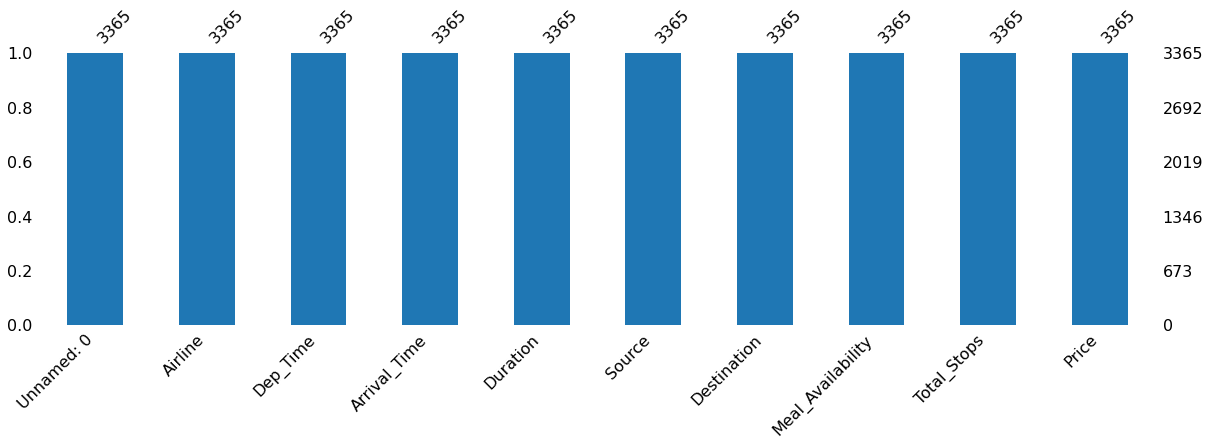

In [6]:
missingno.bar(df, figsize = (20,5), color="tab:blue")

##### Remarks:
We can see that there are no null values present in the dataset.

### Data Pre-processing

In [7]:
#droping the unwanted column
df.drop(columns = 'Unnamed: 0', inplace = True)

In [8]:
df.head()

,Airline,Dep_Time,Arrival_Time,Duration,Source,Destination,Meal_Availability,Total_Stops,Price
0,Go First,08:00,10:10,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
1,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
2,Go First,21:00,23:15,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
3,Go First,16:45,21:25,4h 40m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"
4,Go First,12:35,18:10,5h 35m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"


In [9]:
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
Total_Stops,5
Airline,7
Meal_Availability,8
Source,9
Destination,9
Dep_Time,203
Arrival_Time,219
Duration,417
Price,874


#### Remarks:
In the above cell, we can see the number of unique values present in each of the columns of our dataset.

In [10]:
#lets check Meal_Availability 
df["Meal_Availability"].value_counts()

Free Meal                1854
eCash 250                 936
No Meal Fare              554
Emissions: 185 Kg CO2       9
Emissions: 109 Kg CO2       8
Emissions: 191 Kg CO2       2
Emissions: 237 Kg CO2       1
Emissions: 105 Kg CO2       1
Name: Meal_Availability, dtype: int64

##### Remarks:
Here in column Meal_Availability, we are having some entries as 'Emissions: 185 Kg CO2, Emissions: 109 Kg CO2, etc' , we will replace these with 'None'

In [11]:
df.Meal_Availability.replace({"No Meal Fare": "No Meals",
                              "Free Meal": "Free Meals", "eCash 250": "eCash Meals",
                              "Emissions: 185 Kg CO2" : "None",
                              "Emissions: 109 Kg CO2" : "None",
                              "Emissions: 191 Kg CO2" : "None",
                              "Emissions: 237 Kg CO2" : "None",
                              "Emissions: 105 Kg CO2" : "None",}, 
                             inplace = True)

In [12]:
#replacing the categorical values from Total_Stops column to numeric data
df.Total_Stops.replace({"Non Stop": 0,
            "1 Stop": 1,
            "2 Stop(s)": 2,
            "3 Stop(s)": 3,
            "4 Stop(s)": 4},
           inplace = True)
df["Total_Stops"].value_counts()

1    1728
2    1043
0     392
3     189
4      13
Name: Total_Stops, dtype: int64

In [13]:
df

,Airline,Dep_Time,Arrival_Time,Duration,Source,Destination,Meal_Availability,Total_Stops,Price
0,Go First,08:00,10:10,2h 10m,New Delhi,Mumbai,eCash Meals,0,"5,954"
1,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash Meals,0,"5,954"
2,Go First,21:00,23:15,2h 15m,New Delhi,Mumbai,eCash Meals,0,"5,954"
3,Go First,16:45,21:25,4h 40m,New Delhi,Mumbai,eCash Meals,1,"5,954"
4,Go First,12:35,18:10,5h 35m,New Delhi,Mumbai,eCash Meals,1,"5,954"
...,...,...,...,...,...,...,...,...,...
3360,Air India,11:05,20:30,9h 25m,Lucknow,Goa,Free Meals,1,"12,084"
3361,Air India,08:50,14:55,6h 05m,Lucknow,Goa,eCash Meals,1,"12,818"
3362,Air India,08:55,22:25,13h 30m,Lucknow,Goa,Free Meals,3,"13,137"
3363,Air India,08:55,06:25,21h 30m,Lucknow,Goa,Free Meals,2,"13,137"


In [14]:
#Extracting numerical data from Duration 
df["hour"] = df.Duration.str.split('h').str.get(0)
df["min"] = df.Duration.str.split('h').str.get(1)
df["min"]=df["min"].str.split('m').str.get(0)
df["hour"]=df['hour'].astype('float')
df["min"]=df['min'].astype('float')

df["Duration"] = df["hour"] + df["min"]/60

In [15]:
#checking the dataset
df.head()

,Airline,Dep_Time,Arrival_Time,Duration,Source,Destination,Meal_Availability,Total_Stops,Price,hour,min
0,Go First,08:00,10:10,2.166667,New Delhi,Mumbai,eCash Meals,0,"5,954",2.0,10.0
1,Go First,14:20,16:35,2.250000,New Delhi,Mumbai,eCash Meals,0,"5,954",2.0,15.0
2,Go First,21:00,23:15,2.250000,New Delhi,Mumbai,eCash Meals,0,"5,954",2.0,15.0
3,Go First,16:45,21:25,4.666667,New Delhi,Mumbai,eCash Meals,1,"5,954",4.0,40.0
4,Go First,12:35,18:10,5.583333,New Delhi,Mumbai,eCash Meals,1,"5,954",5.0,35.0


In [16]:
#dropping columns hour and min
df.drop(columns = ["hour","min"], inplace = True)

In [17]:
#converting datatype of Price column to float
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype('float')

#### Extracting numerical data from Dep_Time and Arrival_Time columns using the datetime functionality below:

In [18]:
df["Dep_hour"] = pd.to_datetime(df.Dep_Time, format="%H:%M").dt.hour
df["Dep_min"] = pd.to_datetime(df.Dep_Time, format="%H:%M").dt.minute
df["Dep_Time"]= df['Dep_hour']+df['Dep_min']/60
df.drop(columns = ['Dep_hour','Dep_min'],inplace=True)  

In [19]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time, format="%H:%M").dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time, format="%H:%M").dt.minute
df["Arrival_Time"]= df['Arrival_hour']+df['Arrival_min']/60
df.drop(columns = ['Arrival_hour','Arrival_min'],inplace=True)    

In [20]:
df.head()

,Airline,Dep_Time,Arrival_Time,Duration,Source,Destination,Meal_Availability,Total_Stops,Price
0,Go First,8.000000,10.166667,2.166667,New Delhi,Mumbai,eCash Meals,0,5954.0
1,Go First,14.333333,16.583333,2.250000,New Delhi,Mumbai,eCash Meals,0,5954.0
2,Go First,21.000000,23.250000,2.250000,New Delhi,Mumbai,eCash Meals,0,5954.0
3,Go First,16.750000,21.416667,4.666667,New Delhi,Mumbai,eCash Meals,1,5954.0
4,Go First,12.583333,18.166667,5.583333,New Delhi,Mumbai,eCash Meals,1,5954.0


In [21]:
#checking the datatype
df.dtypes

Airline               object
Dep_Time             float64
Arrival_Time         float64
Duration             float64
Source                object
Destination           object
Meal_Availability     object
Total_Stops            int64
Price                float64
dtype: object

##### Remarks:
Listing down the datatype of all our columns after the conversion and we will be using encoding methods to deal with the remaining object data type column values later.

### Exploratory Data Analysis (EDA)

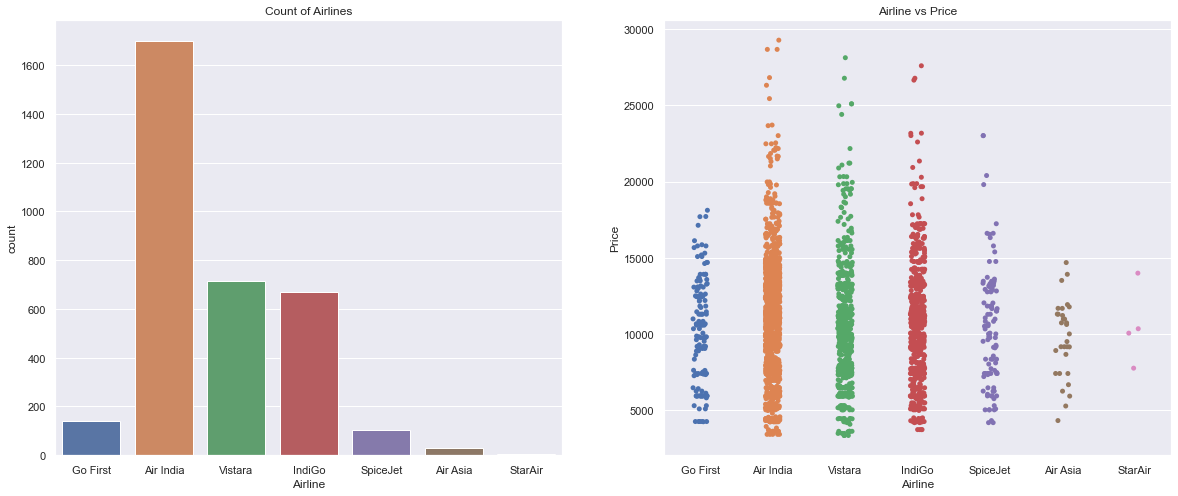

In [24]:
#checking the count of Airline and the relation between Airline and Price
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Airline)
plt.title('Count of Airlines')

plt.subplot(1,2,2)
sns.stripplot(x='Airline',y='Price', data=df)
plt.title('Airline vs Price')

plt.show()

##### Remarks:
* The count of Air India airline is highest, followed by Vistara and then Indigo.
* The count of airline is lowest for StarAir followed by Air Asia.
* From the Airline Vs Price plot, we see that the flight price for Air India is highest, which is followed by Vistara, Indigo and then SpiceJet.
* The flight price is least for StarAir airline and then Air Asia.

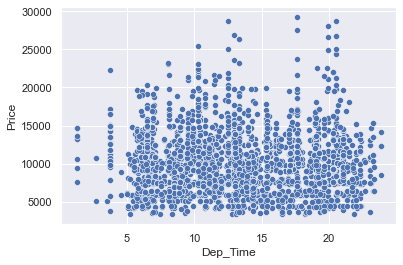

In [25]:
#checking the relation between Dep_Time and Price
sns.scatterplot(x='Dep_Time',y='Price',data=df)
plt.show()

##### Remarks:
Above scatter plot is showing the relationship between Departure time and flight prices. We can observe that there are very few flights departing in the early morning which are having lower price as well.

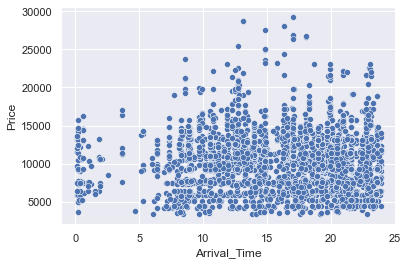

In [26]:
#checking the relation between Arrival_Time and Price
sns.scatterplot(x='Arrival_Time',y='Price',data=df)
plt.show()

##### Remarks:
The above scatter plot is showing relation between Time of arrival and flight prices, which shows that a few number of flights are arriving in the early morning around 0 to 5 am. As We can see in the plot, the flight prices are not much dependent on the time of arrival.

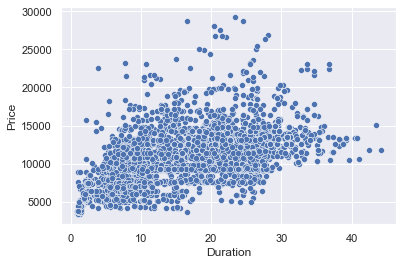

In [27]:
#checking the relation between Duration and Price
sns.scatterplot(x='Duration',y='Price',data=df)
plt.show()

##### Remarks:
From the above plot, we see that as the overall flight duration increases, the flight prices increases too and that makes direct flight depart and arrive in a relatively shorter period of time.

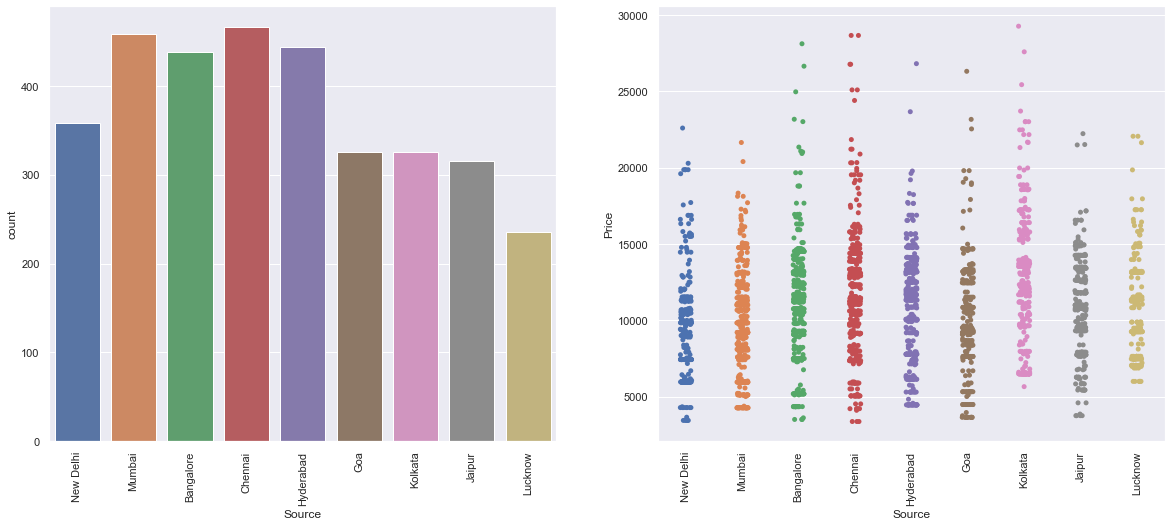

In [28]:
#checking the count and relation of Source with target variable Price
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Source)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Source',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

##### Remarks:
* Majority of flights travel from source Chennai which is followed by Mumbai, Hyderabad and then Bangalore.
* Other locations from which people like to fly are New Delhi, Goa, Kolkata and Jaipur.
* From the count plot, it seems that less people fly from Lucknow.
* From the source vs price plot, we can see that flight price is the highest from Kolkata, which is followed by Chennai, Bangalore, and then Hyderabad.
* The flight prices from New Delhi, Lucknow and Jaipur is almost similar.
* The least flight price is from Chennai, Bangalore ,Delhi, Goa and Jaipur.


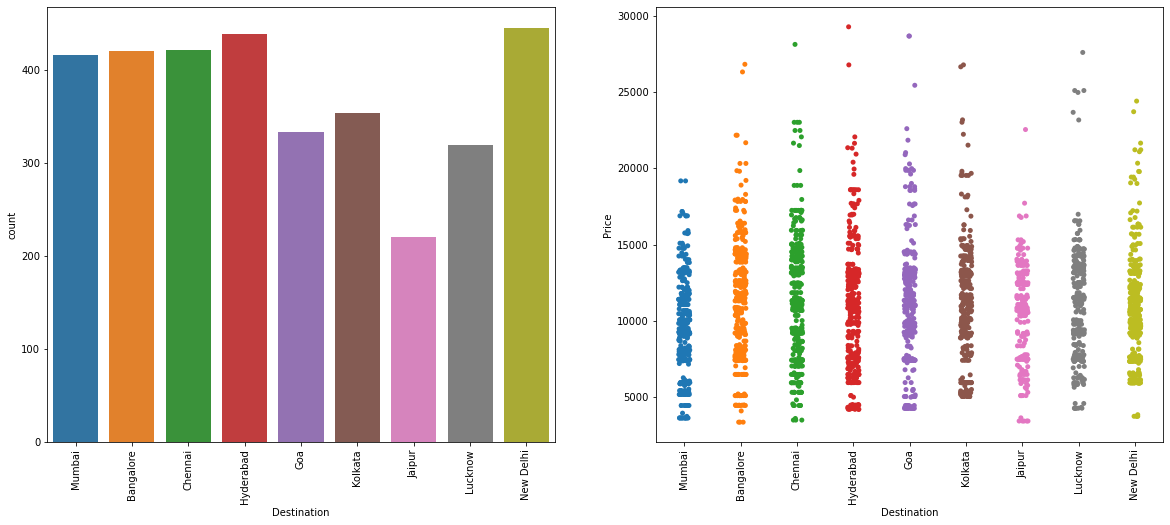

In [22]:
#checking the count and relation of Destination with target variable
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Destination)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Destination',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

##### Remarks:
* More number of flights fly to New Delhi and then to Hyderabad.
* The number of flights to Bangalore, Chennai and Mumbai is almost similar.
* The number of flights flying to Jaipur is lowest as compared to the other locations.
* Flight price is highest to travel to Hyderabad, then to Goa, Chennai and Lucknow.
* To travel to Bangalore and Kolkata, the flight price is similar.
* Prices are low for flights flying to Mumbai, and Jaipur.

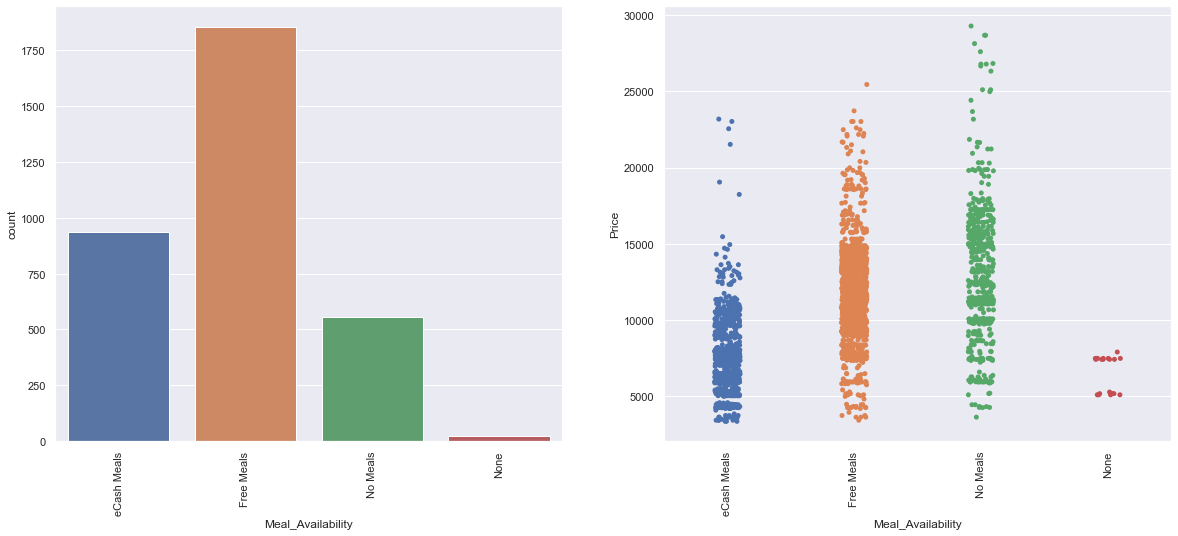

In [30]:
#checking the relation between Meal_Availability and Price
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Meal_Availability)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Meal_Availability',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

##### Remarks:
* From the above plot, we can see that more number of flights offering free meals which are probably for tickets that include those prices and meal services.
* Next, we can see that flights are offering the eCash meals option that can be redeemed to purchase food during long journey flights, mostly with multiple stops.
* Lastly, there are flights that are not offering any meals which may be because they are flying short distances and duration.
* From the Meal_Availability vs Price plot, we can conclude that Flight prices is higher for flights offering no meals, which is followed by Flights offering free meals, and lastly flights offering eCash meals.

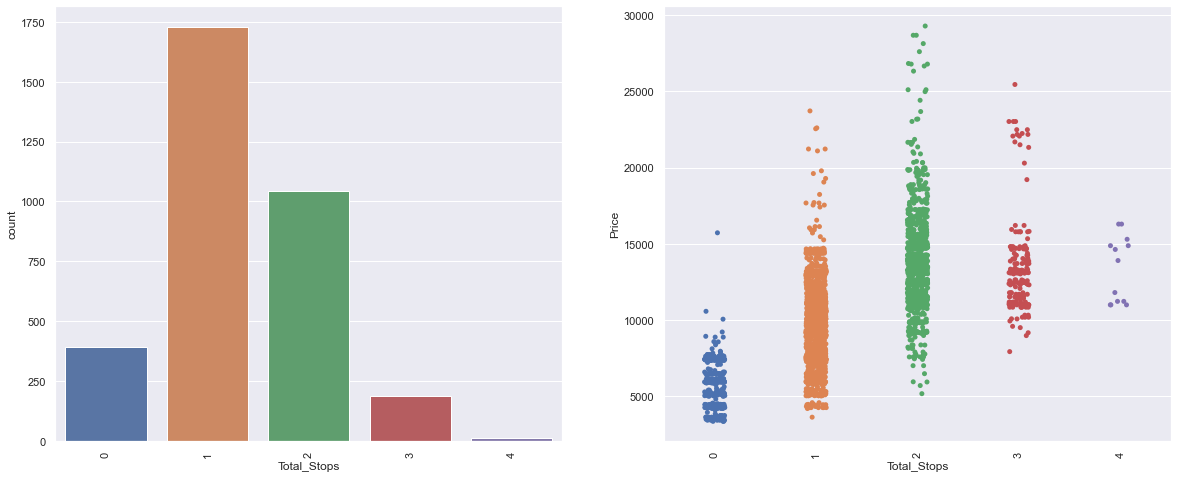

In [31]:
#checking the count of Total_Stops and relation with price
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Total_Stops)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Total_Stops',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

##### Remarks:
* Higher number of People are buying flight tickets that have 1 stop layover.
* Next, we see that people buys flight tickets having 2 stops, which is followed by people getting non-stop flight tickets.
* In domestic flights we rarely see 3 or 4 stops, hence the number of stops is very less in this case.
* The flight price is the highest for flights having 2 stops, followed by flights having 3 and 1 stops.
* The Non-stop flights tickets price is the least.

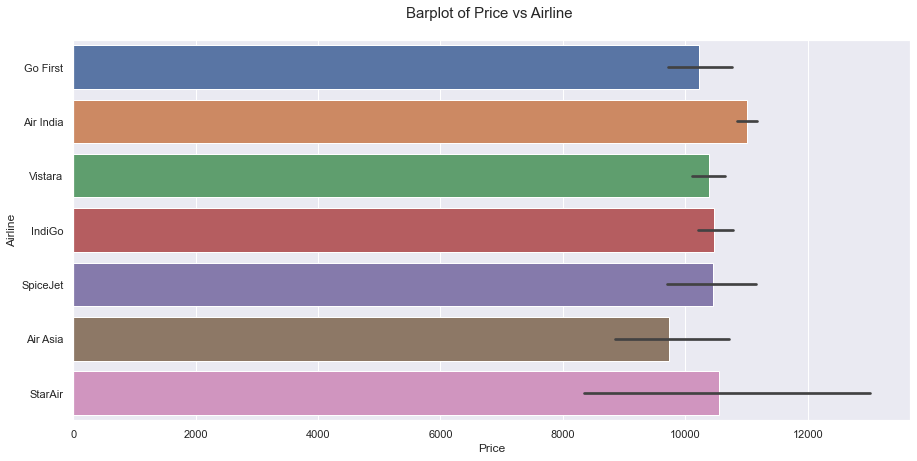

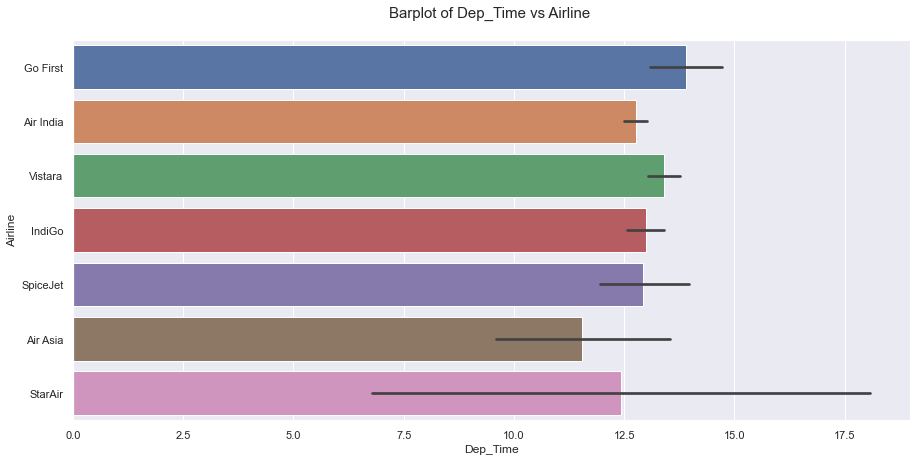

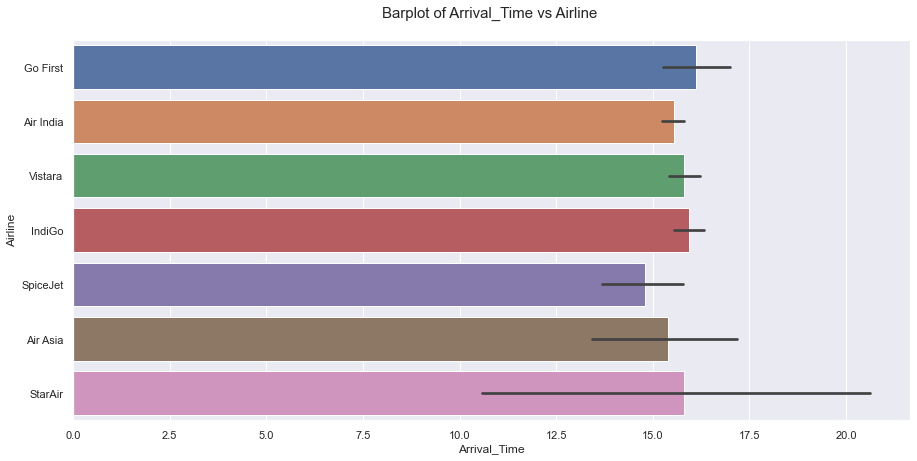

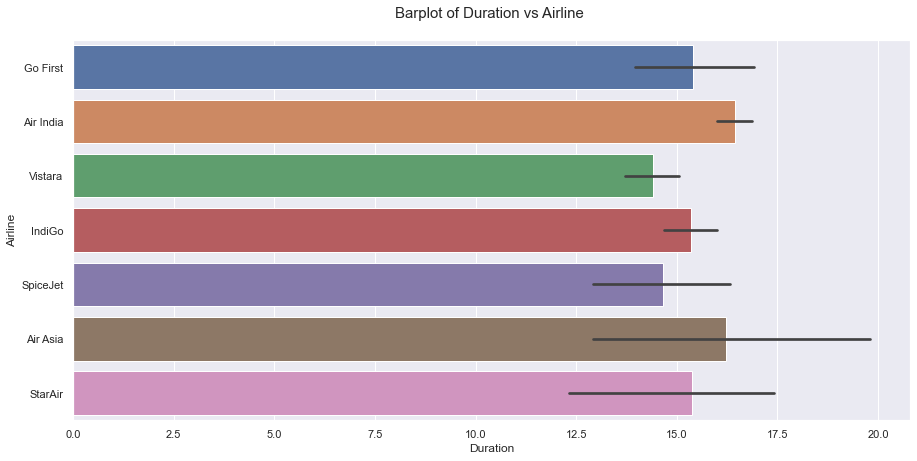

In [32]:
#checking barplot
y = 'Airline'

x = 'Price'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot of {x} vs {y} \n", fontsize = 15)
plt.show()

x = 'Dep_Time'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot of {x} vs {y} \n", fontsize = 15)
plt.show()

x = 'Arrival_Time'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot of {x} vs {y} \n", fontsize = 15)
plt.show()

x = 'Duration'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot of {x} vs {y} \n", fontsize = 15)
plt.show()


##### Remarks:
* Comparing the barplots for Flight Prices vs Airline. we can clearly see that Air India has the highest flight prices while the other airlines like IndiGo, Vistara, SpiceJet, Go First, and StarAir lies in the similar price range, whereas Air Asia has the lowest fare among all.
* When we observe the barplot for Departure time vs Airline we can see that Go First takes the highest departure time while Air Asia takes the least departure time.
* Considering the barplot for Arrival time vs Airline we can see that Go First and StarAir collectively takes the highest arrival time while SpiceJet takes the least time to arrive at the destination.
* Looking at the barplot for Duration vs Airline, we observe that Air India and Air Asia takes the highest flight duration while Indigo and Vistara takes the lowest flight duration.


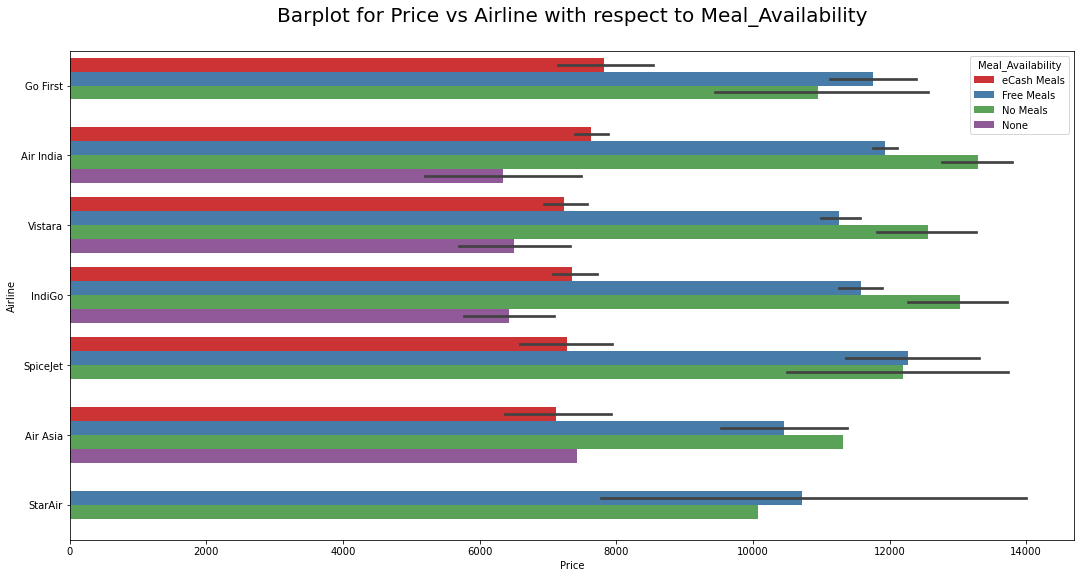

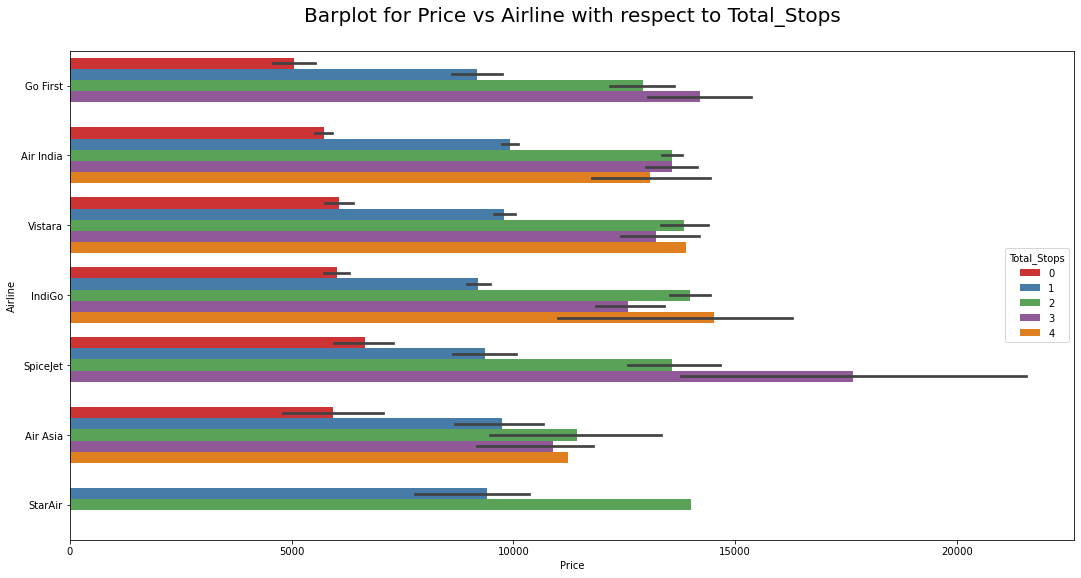

In [24]:
#checking barplots
x = "Price"
y = "Airline"

plt.figure(figsize=(18,9))
sns.barplot(x=df[x], y=df[y], hue=df['Meal_Availability'], palette="Set1")
plt.title(f"Barplot for {x} vs {y} with respect to Meal_Availability\n", fontsize = 20)
plt.show()

plt.figure(figsize=(18,9))
sns.barplot(x=df[x], y=df[y], hue=df['Total_Stops'], palette="Set1")
plt.title(f"Barplot for {x} vs {y} with respect to Total_Stops\n", fontsize = 20)
plt.show()

##### Remarks:
* SpiceJet is having the highest free meal service on their flight as compared to all other flights. While Air India and Indigo is having the highest no meal option on their flights, but these flights are having high ticket price.
* The eCash meal service is not available for StarAir flights.
* As it can see from the second plot that the flights with 0 stops or rather direct flights for every airline is cheaper as compared to 1 or more stops.
* Next, flights with 2 and 3 stops have a considerably high price and number of flights available in those records are high too.
* Except for SpiceJet, StarAir and Go First Airline, all other airlines are having 4 layover stops even in a domestic environment.
* StarAir has only flights available with 1 and 2 stops.

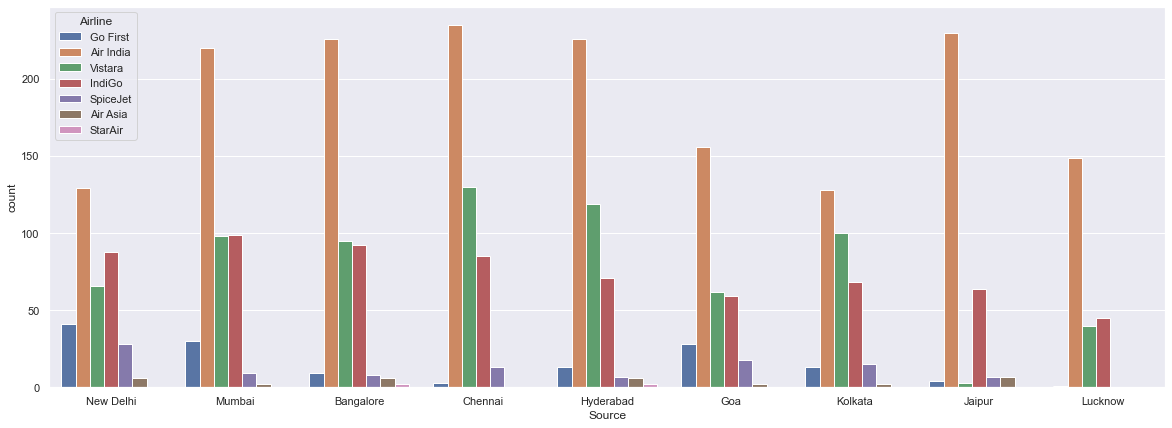

In [34]:
#checking the most popular flights region-wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "Airline", data = df)
plt.show()

##### Remarks:
* The above plot is showing the region wise count of Airlines that shows that Jaipur is not having any flight of Vistara and the city Lucknow is not having any flight of SpiceJet,Air Asia, StarAir, and Go First. 
* All cities are having higher count of flight of Air India compared to other flights.

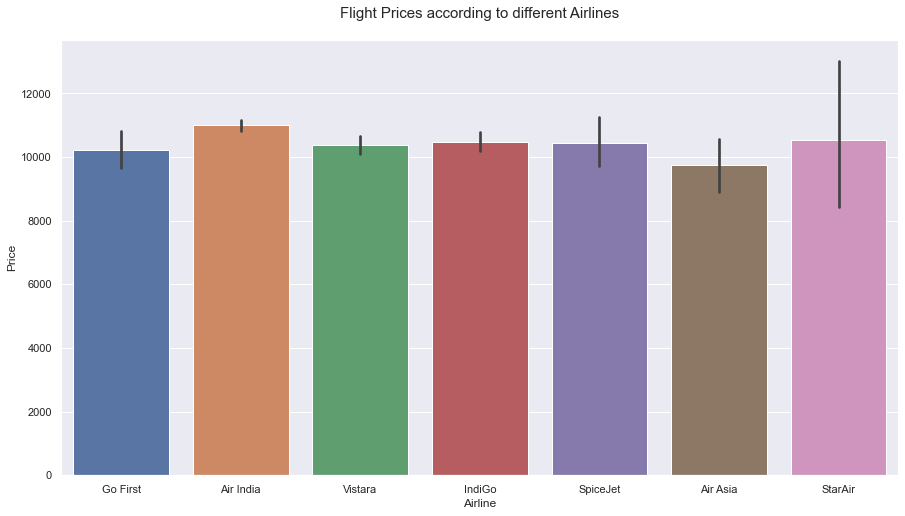

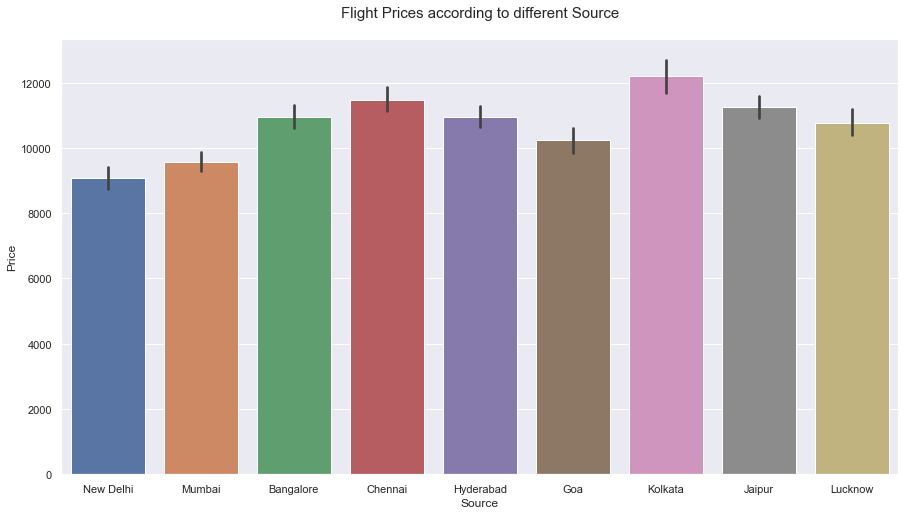

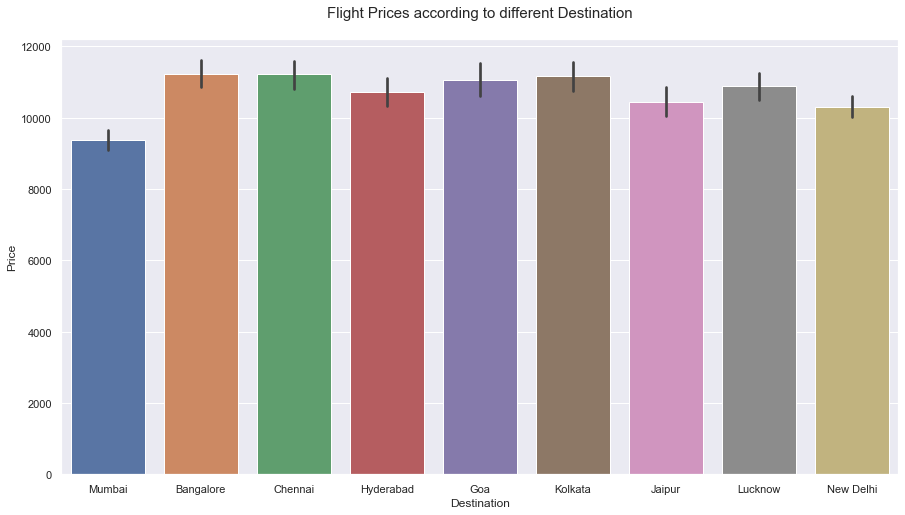

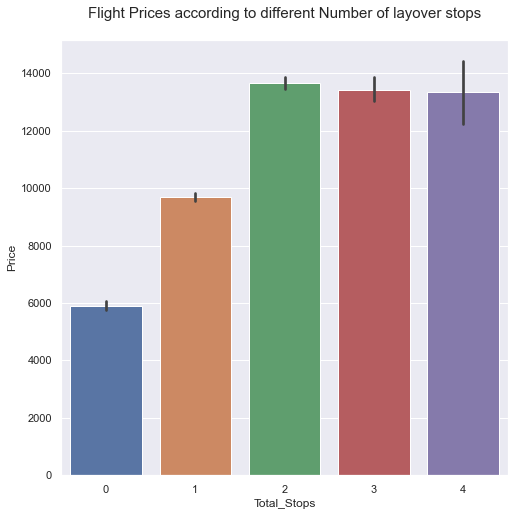

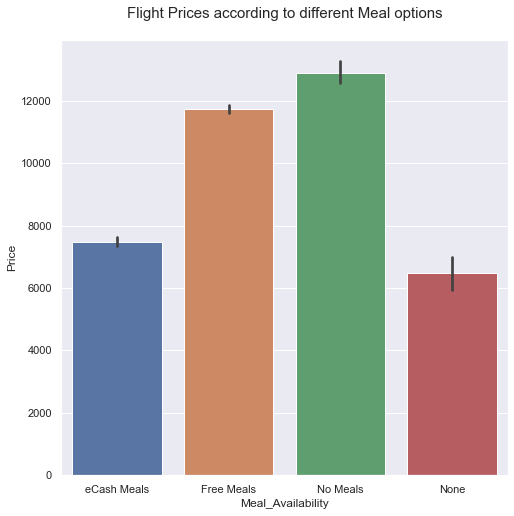

In [35]:
#checking barplots
y = "Price"

x = "Airline"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Flight Prices according to different Airlines\n", fontsize = 15)
plt.show()

x = "Source"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Flight Prices according to different Source\n", fontsize = 15)
plt.show()

x = "Destination"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Flight Prices according to different Destination\n", fontsize = 15)
plt.show()

x = "Total_Stops"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Flight Prices according to different Number of layover stops\n", fontsize = 15)
plt.show()

x = "Meal_Availability"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Flight Prices according to different Meal options\n", fontsize = 15)
plt.show()

##### Remarks:
* Airfare in Air India is quite high as compared to other airlines as they provide free meal service which probably is just meal cost included in the tickets.
* Airfare is almost similar for other remaining Airline while Air Asia is having the least fare.
* Flight prices when departing from cities like Kolkata, Jaipur and Chennai is higher, while the others flights are having somewhat similar flight prices except for New Delhi which is having the least fare.
* Similarly prices when arriving from cities like Kolkata, Bangalore, and Chennai is higher, however the lowest price is for Mumbai city, and the rest falls in similar price range.
* From the barplot of Total_Stops, we can see that the flight prices are higher for flights having 2,3 and 4 Stops, Whereas prices are cheaper for direct flights and flights having a single stop.
* As per the data collected, we see that no meals service flight tickets cost the highest as compared to flights with free meals service; and the lowest price observed are for eCash meal service wherein the frequent flyers can use their flight points as discounts on the ticket prices.

<Figure size 1440x576 with 0 Axes>

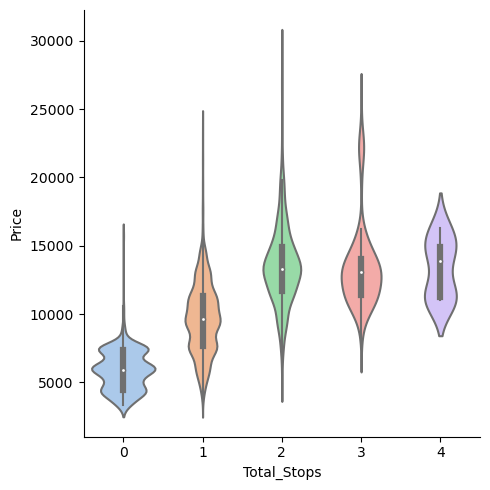

In [36]:
#checking the relation between total_stops and price 
plt.figure(figsize=(20,8))
plt.style.use('default')
sns.catplot(x="Total_Stops", y="Price",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

##### Remarks:
From the above violin plot, we can conclude that the Price for flights having stops more than 1 costs higher than the flights with stops 1 or none.

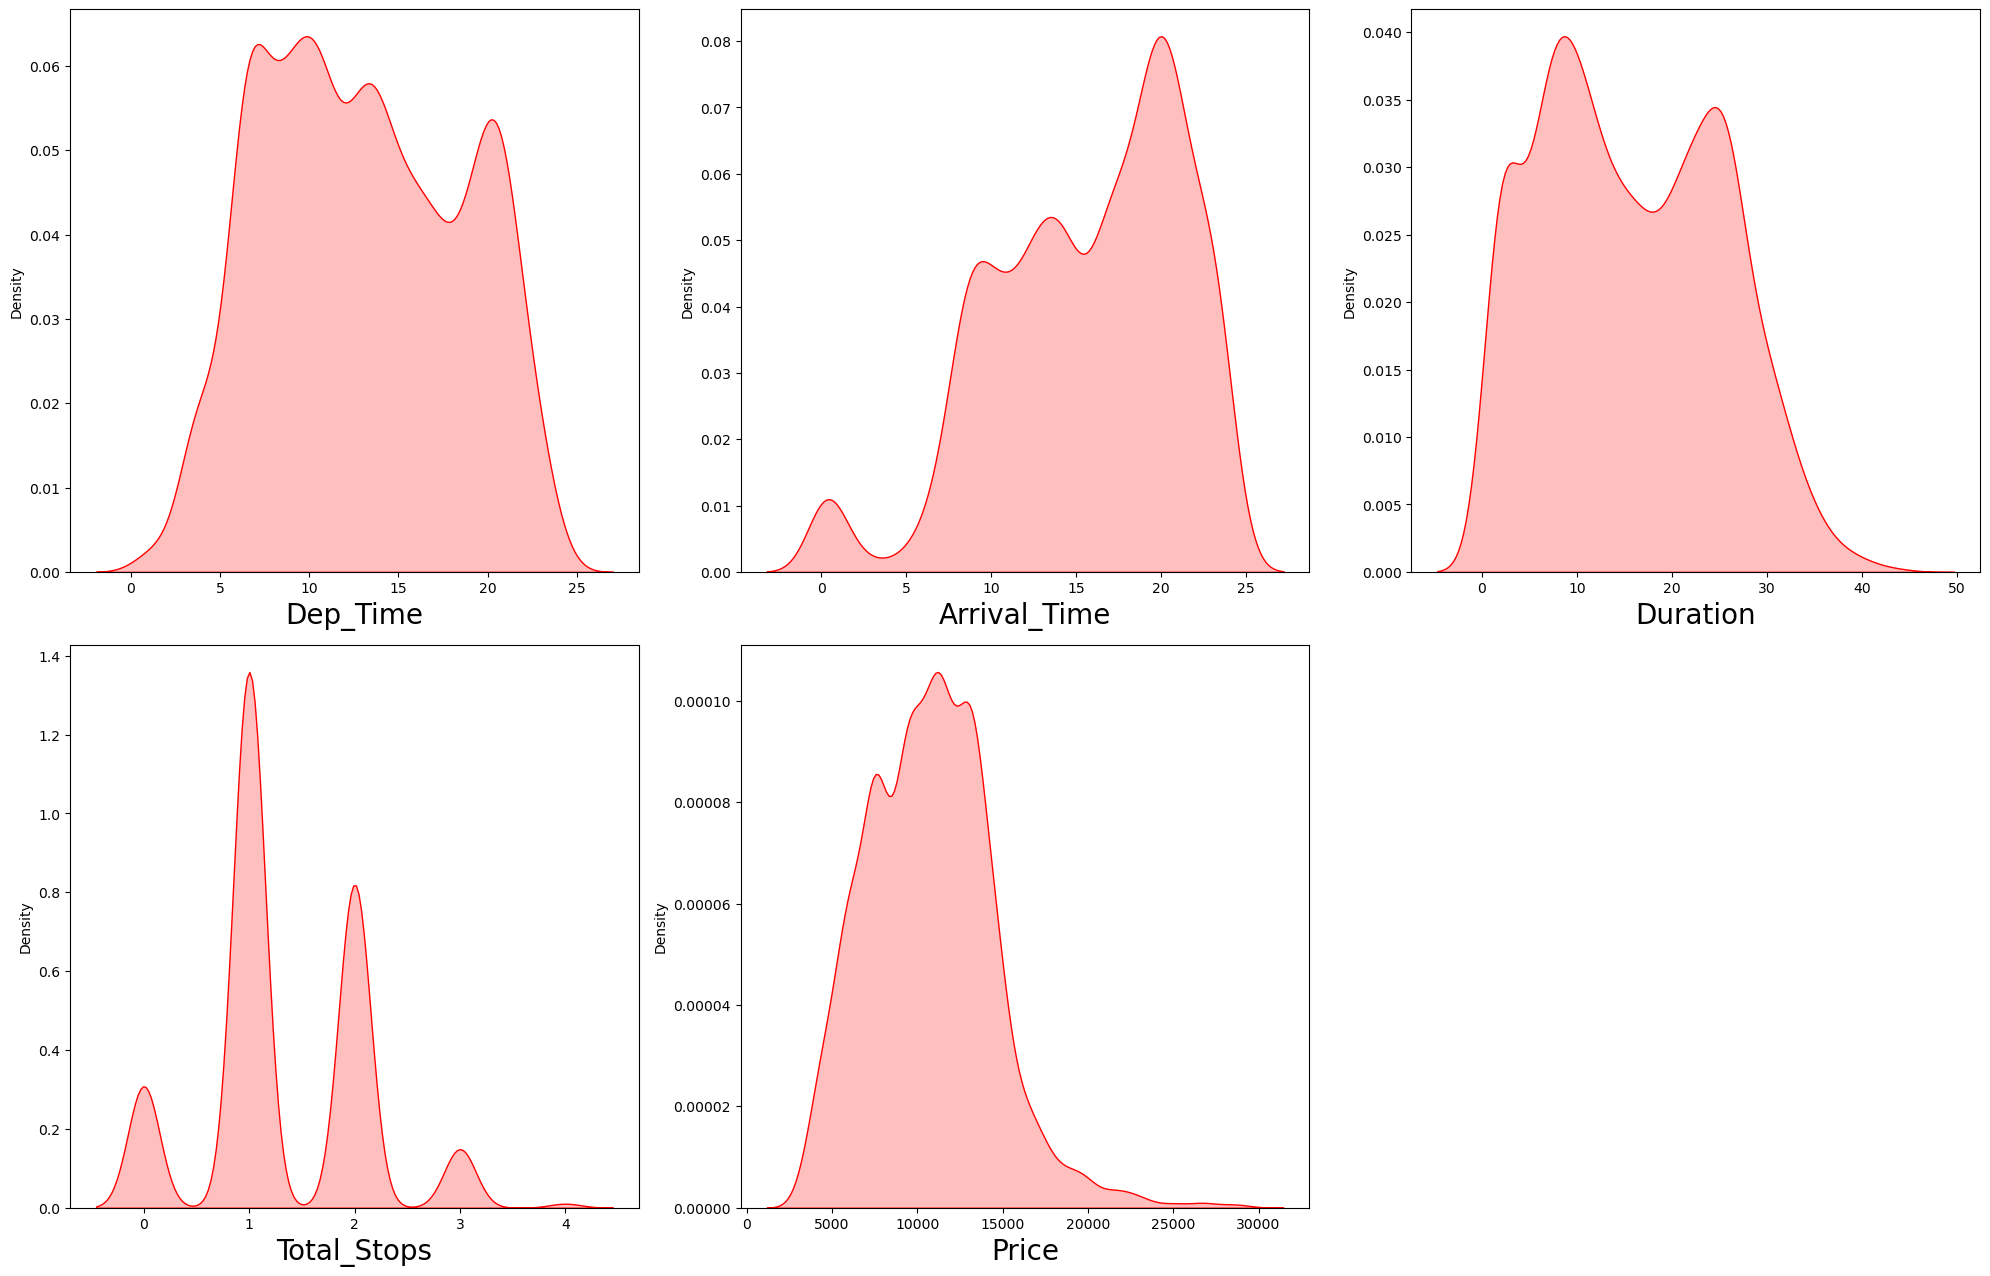

In [25]:
#checking distribution of the data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (20,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

##### Remarks:
Looking at the distribution of the features, we can see that there are some outliers present in our data and data is skewed too. Hence we have to remove both skewness and outliers from our data.

In [38]:
#applying zscore to remove outliers
z_score = zscore(df[['Duration']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(3364, 9)

##### Remarks:

After removing outliers from our data, we see that we did not lose much data.

## Encoding:

In [39]:
#converting categorical data into numeric values using OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [40]:
df

,Airline,Dep_Time,Arrival_Time,Duration,Source,Destination,Meal_Availability,Total_Stops,Price
0,2.0,8.000000,10.166667,2.166667,8.0,7.0,3.0,0,5954.0
1,2.0,14.333333,16.583333,2.250000,8.0,7.0,3.0,0,5954.0
2,2.0,21.000000,23.250000,2.250000,8.0,7.0,3.0,0,5954.0
3,2.0,16.750000,21.416667,4.666667,8.0,7.0,3.0,1,5954.0
4,2.0,12.583333,18.166667,5.583333,8.0,7.0,3.0,1,5954.0
...,...,...,...,...,...,...,...,...,...
3360,1.0,11.083333,20.500000,9.416667,6.0,2.0,0.0,1,12084.0
3361,1.0,8.833333,14.916667,6.083333,6.0,2.0,3.0,1,12818.0
3362,1.0,8.916667,22.416667,13.500000,6.0,2.0,0.0,3,13137.0
3363,1.0,8.916667,6.416667,21.500000,6.0,2.0,0.0,2,13137.0


In [41]:
#Checking the statistical summary of our data
df.describe()

,Airline,Dep_Time,Arrival_Time,Duration,Source,Destination,Meal_Availability,Total_Stops,Price
count,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000
mean,2.590071,12.990438,15.677789,15.686162,3.809156,3.990785,1.011891,1.317182,10703.964625
std,1.980105,5.412700,5.574608,9.349684,2.668050,2.713537,1.292436,0.765088,3707.822862
min,0.000000,1.250000,0.083333,0.833333,0.000000,0.000000,0.000000,0.000000,3361.000000
25%,1.000000,8.500000,11.833333,7.833333,1.000000,1.750000,0.000000,1.000000,7736.000000
50%,1.000000,12.916667,16.583333,14.916667,4.000000,4.000000,0.000000,1.000000,10744.000000
75%,3.000000,17.583333,20.083333,23.666667,6.000000,7.000000,3.000000,2.000000,13137.000000
max,6.000000,23.833333,23.916667,43.416667,8.000000,8.000000,3.000000,4.000000,29274.000000


##### Remarks:
Using the describe method, we are a look at all the column value details which is basically it's count, mean, standard deviation, min, 25%, 50%, 75% and max quartile data.

## Heatmap to check correlation

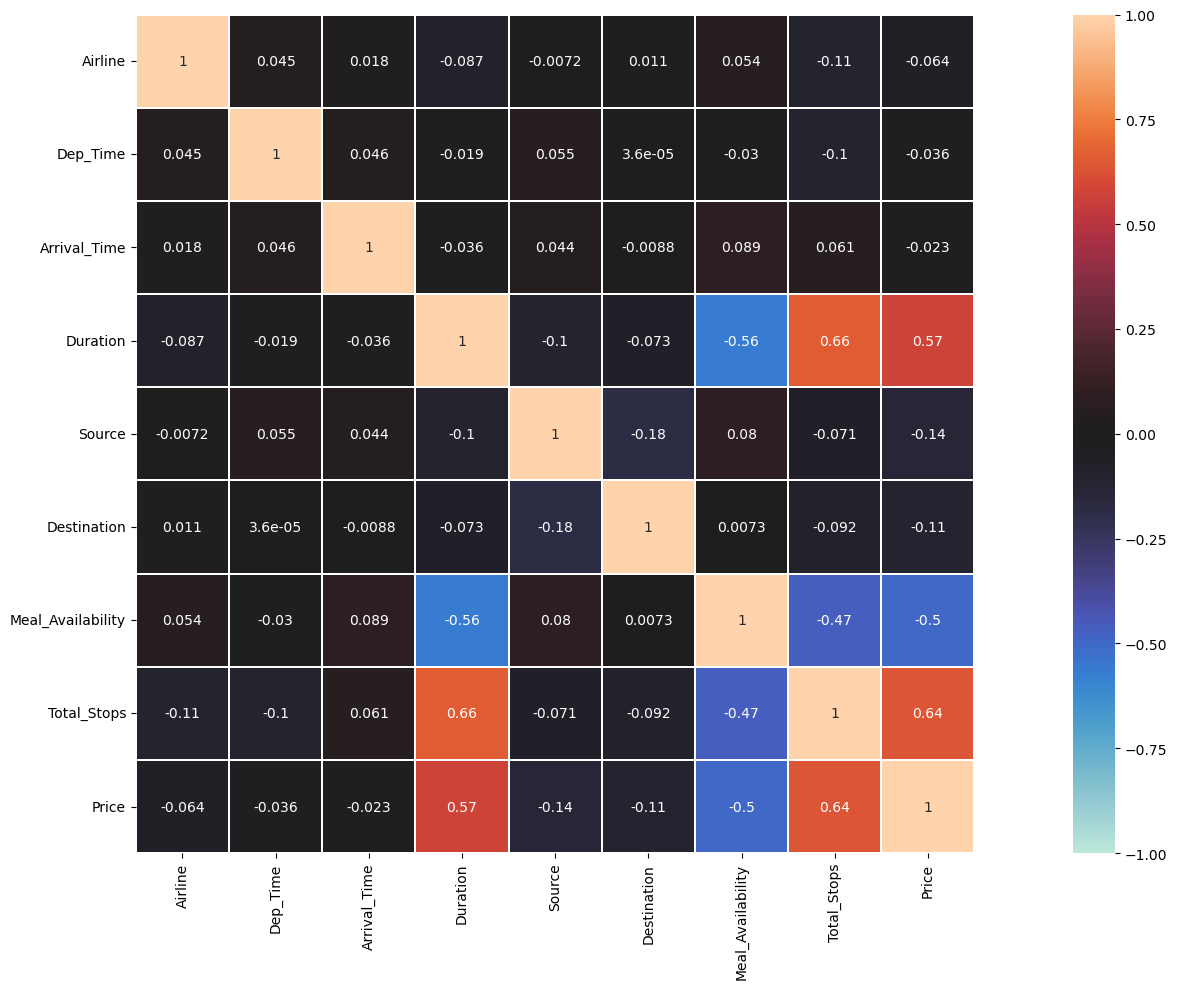

In [42]:
#plotting heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

#####  Remarks:
From the above correlation heatmap, we can see that except for Total_Stops and Duration, all other features is having negative correlation with our target 'Price'.

In [43]:
#checking the skewness
df.skew()

Airline              0.815233
Dep_Time             0.105912
Arrival_Time        -0.654788
Duration             0.220332
Source               0.118362
Destination          0.028674
Meal_Availability    0.751878
Total_Stops          0.353748
Price                0.646971
dtype: float64

##### Remarks:
There is skewness present in our data.

In [44]:
#shuffling our data to get better result while evaluating
df = df.sample(frac = 1)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

In [45]:
df

,Airline,Dep_Time,Arrival_Time,Duration,Source,Destination,Meal_Availability,Total_Stops,Price
0,3.0,10.250000,11.833333,25.583333,5.0,1.0,1.0,2,17240.0
1,6.0,8.166667,14.333333,6.166667,8.0,0.0,0.0,1,9840.0
2,3.0,20.333333,14.833333,18.500000,1.0,5.0,0.0,4,16292.0
3,1.0,10.750000,16.333333,29.583333,7.0,1.0,1.0,2,15014.0
4,1.0,18.500000,18.083333,23.583333,7.0,5.0,1.0,1,14448.0
...,...,...,...,...,...,...,...,...,...
3359,6.0,12.000000,15.916667,3.916667,3.0,1.0,3.0,1,7603.0
3360,3.0,20.250000,17.000000,20.750000,6.0,2.0,0.0,3,11048.0
3361,1.0,3.750000,12.250000,8.500000,4.0,0.0,0.0,1,9524.0
3362,6.0,6.916667,15.916667,9.000000,7.0,1.0,3.0,1,8253.0


### Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label

In [46]:
x = df.drop(columns = 'Price')
y = df['Price']

In [48]:
#removing the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [49]:
#checking skewness after removal
x.skew()

Airline              0.433340
Dep_Time             0.105912
Arrival_Time        -0.654788
Duration             0.220332
Source               0.118362
Destination          0.028674
Meal_Availability    0.545390
Total_Stops          0.353748
dtype: float64

##### Remarks:
We have successfully removed lots of skewed data.

### Applying StandardScaler to numerical features

In [50]:
#=applying standard scaler to numerical features to bring them to common scale
numeric = ['Dep_Time','Arrival_Time','Duration']
categorical = ['Airline','Source','Destination','Meal_Availability','Total_Stops']
scaler = StandardScaler()
X_numeric_std = pd.DataFrame(data=scaler.fit_transform(x[numeric]), columns=numeric)
X_std = pd.merge(X_numeric_std, x[categorical], left_index=True, right_index=True)

In [51]:
X_std

,Dep_Time,Arrival_Time,Duration,Airline,Source,Destination,Meal_Availability,Total_Stops
0,-0.506373,-0.689740,1.058714,1.386294,5.0,1.0,0.693147,2
1,-0.891327,-0.241211,-1.018314,1.945910,8.0,0.0,0.000000,1
2,1.356807,-0.151505,0.301000,1.386294,1.0,5.0,0.000000,4
3,-0.413984,0.117612,1.486600,0.693147,7.0,1.0,0.693147,2
4,1.018047,0.431582,0.844771,0.693147,7.0,5.0,0.693147,1
...,...,...,...,...,...,...,...,...
3359,-0.183011,0.042857,-1.258999,1.945910,3.0,1.0,1.386294,1
3360,1.341408,0.237220,0.541686,1.386294,6.0,2.0,0.000000,3
3361,-1.707431,-0.614985,-0.768714,0.693147,4.0,0.0,0.000000,1
3362,-1.122300,0.042857,-0.715228,1.945910,7.0,1.0,1.386294,1


### Applying log transformation to our target variable

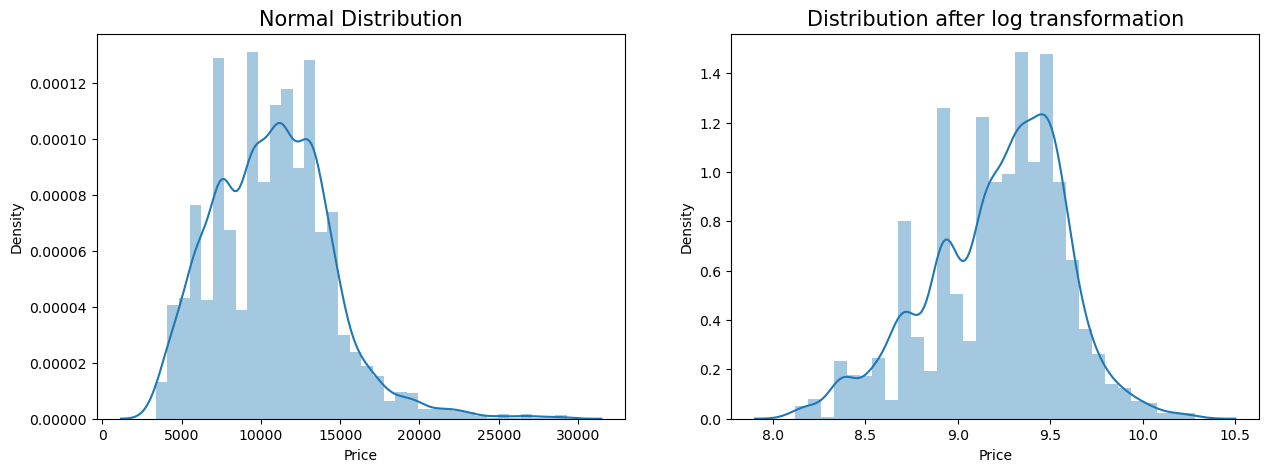

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Normal Distribution",fontsize=15)
sns.distplot(y)
plt.subplot(1,2,2)
plt.title("Distribution after log transformation",fontsize=15)
sns.distplot(np.log(y))
plt.show()

##### Remarks:
To get better results we have applied log transformation to our target variable.

### Finding Best Random State

In [53]:
#to find random stat which gives maximum r2_score
max_r_score=0
r_state = 0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(X_std, np.log(y),test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.5611618603036762 on Random State 3


## Building Machine Learning Model for Regression with Evaluation Metrics:

In [54]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(x, np.log(y),test_size = 0.25, random_state =3)

In [55]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
ext = ExtraTreesRegressor()
lgb = LGBMRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()
lasso = LassoCV(max_iter=1000, normalize = True)
ridge = RidgeCV(cv=10,alphas=[0.1,1], normalize=True)

In [56]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print(f"Training r2 score:", r2_score(y_train,y_pred)*100,"%")
    print(f"Testing r2 Score:", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X_std, np.log(y), cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test,pred)
    plt.show()    

******************************LinearRegression******************************
MAE : 0.18384545506701197
RMSE : 0.23850524783195648
------------------------------
Training r2 score: 52.550864532850184 %
Testing r2 Score: 55.777064825546155 %
------------------------------

Cross validation score : 52.833721911992015

Accuracy Score - Cross Validation Score : 2.9433429135541402


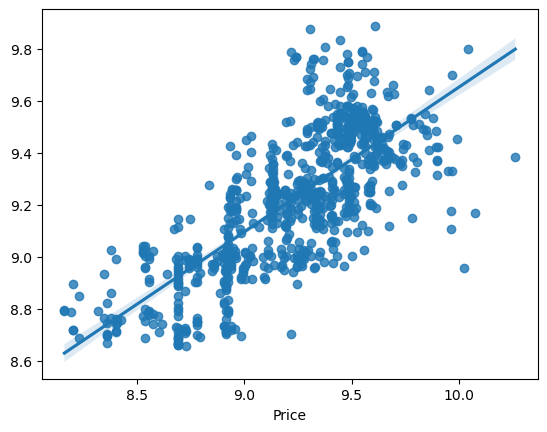

******************************LassoCV******************************
MAE : 0.1839396921725084
RMSE : 0.23892324802951517
------------------------------
Training r2 score: 52.480177760427615 %
Testing r2 Score: 55.62192028071294 %
------------------------------

Cross validation score : 52.829263416272475

Accuracy Score - Cross Validation Score : 2.792656864440467


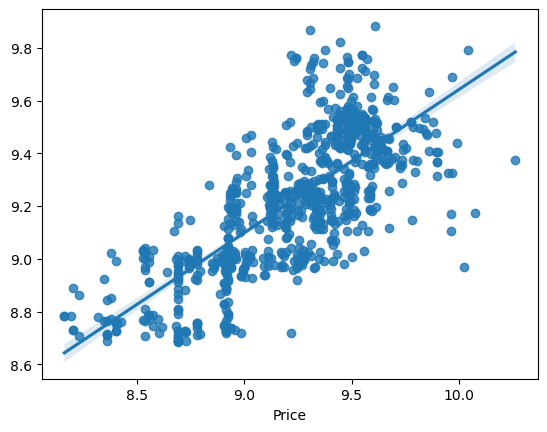

******************************RidgeCV******************************
MAE : 0.1838417600520325
RMSE : 0.23912858148840055
------------------------------
Training r2 score: 52.39847793214621 %
Testing r2 Score: 55.54560941273594 %
------------------------------

Cross validation score : 52.722909652157746

Accuracy Score - Cross Validation Score : 2.822699760578196


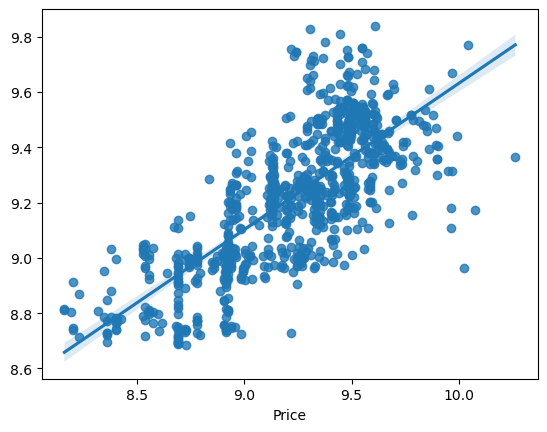

******************************DecisionTreeRegressor******************************
MAE : 0.12555821060567537
RMSE : 0.23014594102018412
------------------------------
Training r2 score: 99.73602594212196 %
Testing r2 Score: 58.82265648357787 %
------------------------------

Cross validation score : 65.16807967852401

Accuracy Score - Cross Validation Score : -6.345423194946136


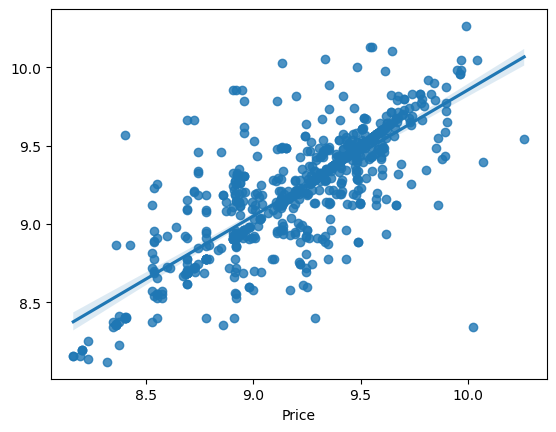

******************************RandomForestRegressor******************************
MAE : 0.10235543341909431
RMSE : 0.15316758602103495
------------------------------
Training r2 score: 96.62230787021204 %
Testing r2 Score: 81.76165522487032 %
------------------------------

Cross validation score : 80.11665227936942

Accuracy Score - Cross Validation Score : 1.6450029455009059


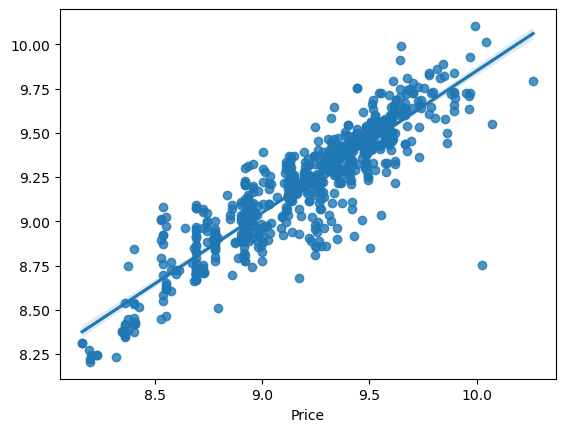

******************************XGBRegressor******************************
MAE : 0.11181156586801354
RMSE : 0.16038674314854567
------------------------------
Training r2 score: 97.34799492626173 %
Testing r2 Score: 80.00190519356214 %
------------------------------

Cross validation score : 80.46272013051208

Accuracy Score - Cross Validation Score : -0.46081493694994435


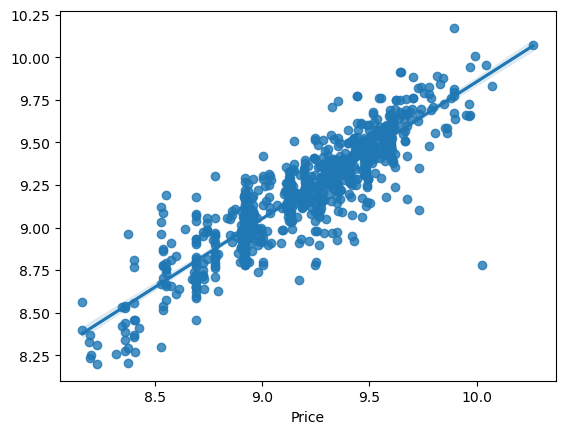

******************************ExtraTreesRegressor******************************
MAE : 0.09498484671151398
RMSE : 0.15359179997847167
------------------------------
Training r2 score: 99.73602594212089 %
Testing r2 Score: 81.66048924342815 %
------------------------------

Cross validation score : 81.40346509648411

Accuracy Score - Cross Validation Score : 0.2570241469440333


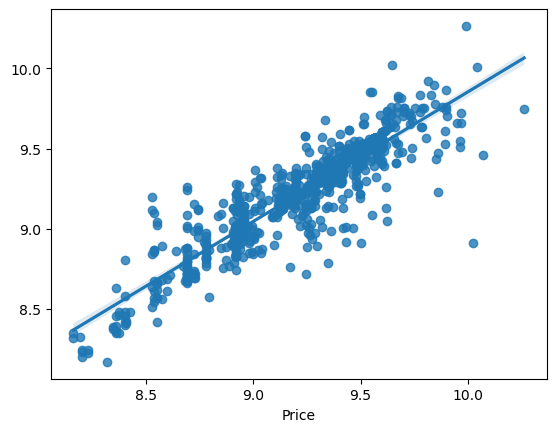

******************************LGBMRegressor******************************
MAE : 0.11134615359349478
RMSE : 0.1565701415135834
------------------------------
Training r2 score: 89.68948816260497 %
Testing r2 Score: 80.94234002796858 %
------------------------------

Cross validation score : 79.95563770752547

Accuracy Score - Cross Validation Score : 0.9867023204431149


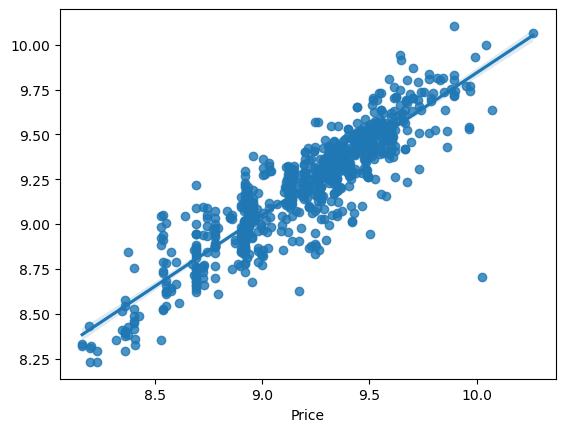

******************************GradientBoostingRegressor******************************
MAE : 0.13221482432307366
RMSE : 0.17713327376245394
------------------------------
Training r2 score: 77.08921925934465 %
Testing r2 Score: 75.60774315764527 %
------------------------------

Cross validation score : 73.86789502455909

Accuracy Score - Cross Validation Score : 1.7398481330861841


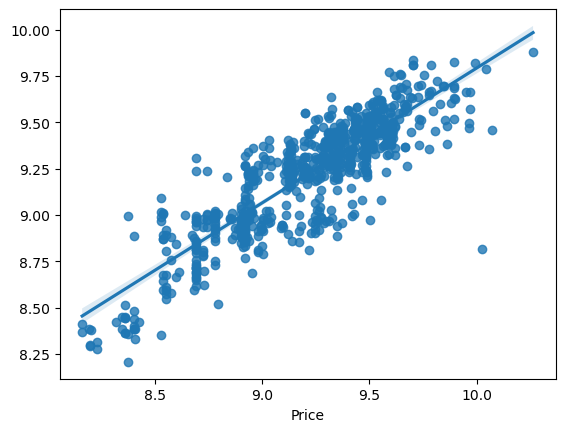

******************************AdaBoostRegressor******************************
MAE : 0.15734152220161227
RMSE : 0.2042971056356698
------------------------------
Training r2 score: 66.43733088453378 %
Testing r2 Score: 67.55288310152518 %
------------------------------

Cross validation score : 65.30058987228497

Accuracy Score - Cross Validation Score : 2.252293229240209


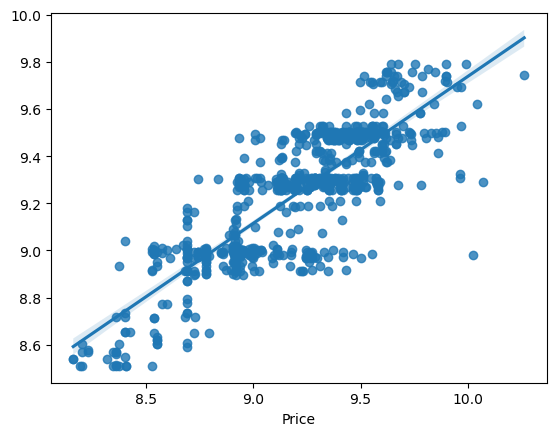

In [57]:
for model in [lr,lasso,ridge,dt,rf,xgb,ext,lgb,gbr,abr]:
    BuiltModel(model)

#### Remarks:
In this project, due to less features and simplicity our model may lead to over-fitting. We can see Linear models showing very less accuracy. We preferred to choose tree-based algorithms among which LGBMRegressor is showing good performance and less difference in r2-score and cv-score so we have selected LGBMRegressor as our best suitable algorithm for our final model.

### Hyper parameter tuning of our best model:

In [58]:
#selecting different parameters for tuning
grid_params = {
                'boosting_type': ['str','gbdt'],
                'max_depth ':[-1,-0.5],
                'learning_rate': [0.1,0.2,0.3],
                'n_estimators':[800,900,1000]
                }

In [59]:
#train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(LGBMRegressor(), grid_params,verbose=1,refit=True,n_jobs=-1, cv = 5)
GSCV.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: -1


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['str', 'gbdt'],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth ': [-1, -0.5],
                         'n_estimators': [800, 900, 1000]},
             verbose=1)

In [60]:
GSCV.best_params_    

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth ': -1,
 'n_estimators': 800}

##### Remarks:
Grid Search CV has provided with the best parameters list out of all the combinations it used to train the model.

### Training and testing our final model with best parameters

In [61]:
model = LGBMRegressor(boosting_type = 'gbdt', learning_rate = 0.1, n_estimators = 800, max_depth=-1)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.10762017452282092
RMSE : 0.15789747307865815
------------------------------
 
r2 Score: 80.61784575635048 %


##### Remarks:
 We have successfully incorporated the Hyper Parameter Tuning on the Final Model and received the R2 score of 80.61% for it.

### Plot of actual vs predicted values

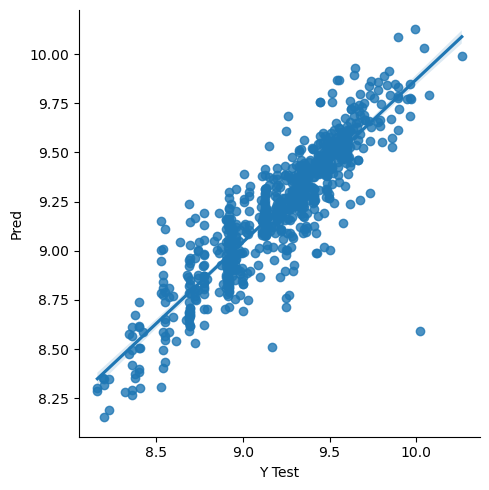

In [62]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

### Prediction of Flight Prices:

In [63]:
predicted_prices = np.exp(pred)

In [64]:
predicted_prices

array([11917.2201306 , 14616.81210363, 10857.52900733,  7181.58765185,
       13670.30489215,  7914.53396952,  5569.40877715, 10350.16230792,
       13356.57381208, 15721.35604194,  8116.11785702,  9120.70196348,
        3611.39696145, 10984.96665227, 13684.74393372, 10748.30338233,
        4790.37825203,  8147.87338076, 13051.22852594,  9901.51399582,
       11461.30130345,  9313.72383452, 19810.58909589, 11803.33583077,
       13023.3362793 ,  8914.17576727,  3474.30478243, 13492.86117425,
        8902.05125974,  6830.8404709 ,  7947.53319424, 11720.45837963,
        6845.79048746,  5255.08028513,  8016.5821134 , 17869.92927436,
        9440.17858252,  8269.91346738, 11339.37718408, 13817.69945281,
        7325.25196001, 12293.82448845,  9675.00219192, 16687.58556778,
       13020.81237683, 10032.86692289,  5690.72555286,  9809.74124838,
       11861.59914692, 15713.36564733, 17513.06869437,  5383.73642409,
        7777.22272716, 11670.62424061,  9815.67698541,  8650.74150946,
      

## Saving the final model:

In [77]:
import joblib
joblib.dump(model,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

## Conclusion:
* In this project, we have scraped the flight data from yatra.com and saved the data in excel file. Then, we have loaded the excel file is into a dataframe to build ML models to predict the flight price.
* After analysing we found that we don't have any missing values in our data set.
* Looking at the data set, we understand that there are some features that needs to be processed like changing the data types, and get the actual value from the string entries from the time related columns.
* After processing the data, we have done some EDA to understand the relation among features and the target variable.
* Features like flight duration, total stops during the journey and the availability of meals are playing major role in predicting the prices of the flights.

* Looking at the features, we came to know that the number of features are very less due to which we are getting somewhat lower r2-scores.
* Some algorithms are facing over-fitting problem which may be because of less number of features in our dataset.
* We can get a better r2 score by fetching some more features by web scraping which may help to reduce the over fitting problem in our models.
